In [378]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# Library scikit-learn 
import sklearn
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [379]:
data_spotify=pd.read_csv("playlist_dataset.csv", sep=",")
data_spotify_copy = data_spotify.copy() # on travaille avec une copie 

In [380]:
data_spotify_copy.shape # taille du df

(2300, 23)

In [381]:
data_spotify_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [382]:
data_spotify_copy.duplicated().any() # pour voir s'il y a des lignes en double

np.False_

In [383]:
data_spotify_copy.isnull().sum() # pour voir le nbr de NaN dans chaque colonnne 
data_spotify_copy[data_spotify_copy.isnull().any(axis=1)] # pour voir les lignes avec des NaN

# on peut juste la supprimer
data_spotify_copy.dropna()  # on a maintenant 2299 lignes

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [384]:
data_spotify_copy.nunique() # pour voir le nbr de valeurs uniques dans chaque colonne 

playlist_url           23
year                   23
track_id             2202
track_name           2121
track_popularity       71
album                1663
artist_id             891
artist_name           891
artist_genres         698
artist_popularity      62
danceability          585
energy                641
key                    12
loudness             1897
mode                    2
speechiness           860
acousticness         1322
instrumentalness      841
liveness              807
valence               827
tempo                2074
duration_ms          2033
time_signature          4
dtype: int64

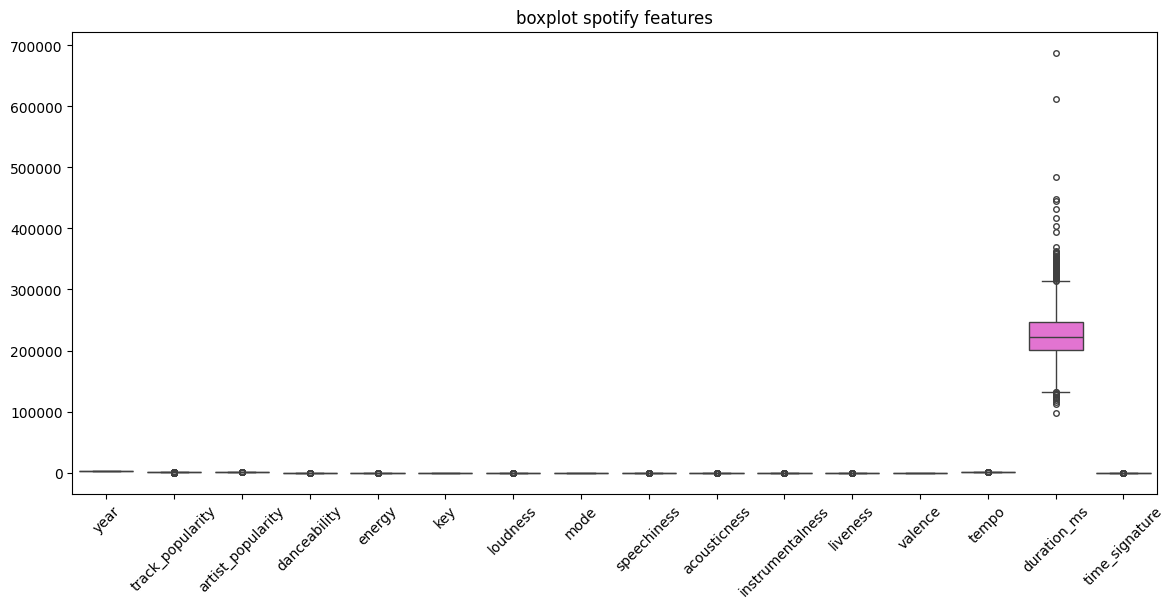

In [385]:
plt.figure(figsize=(14,6))
plt.title('boxplot spotify features')
data_box=sns.boxplot(data=data_spotify_copy,fliersize=4)  
plt.xticks(rotation=45)
plt.show()

# on voit clairement que la colonne duration_ms a des valeurs bien plus grandes que les autres(logique)
# prblm => les algo vont donner bcp plus de poids à cette colonne et invisibilise les autres features

In [386]:
numeric_df = data_spotify_copy.select_dtypes(include=[float, int]) # on garde que les colonnes avec des valeurs numériques pour le calcul de la var
variances = numeric_df.var()
print("Variances avant standardisation :\n" , variances)

mean_var = numeric_df.var().mean() 
print(mean_var)

# la moyenne calculer est fortement influencée par la duration_ms 

Variances avant standardisation :
 year                 4.401914e+01
track_popularity     1.510816e+02
artist_popularity    1.483344e+02
danceability         1.991956e-02
energy               2.717159e-02
key                  1.316597e+01
loudness             4.329950e+00
mode                 2.403982e-01
speechiness          8.546066e-03
acousticness         4.155235e-02
instrumentalness     7.054317e-03
liveness             1.732375e-02
valence              5.190221e-02
tempo                7.627390e+02
duration_ms          1.769353e+09
time_signature       4.798469e-02
dtype: float64
110584636.27942425


In [387]:
skew_variables = numeric_df.skew().to_frame().rename(columns={0 :'skew'})  # calcul du skew de chaque colonne de numeric_df
print(skew_variables.sort_values('skew', ascending=False))

                       skew
instrumentalness   7.946269
liveness           1.997885
speechiness        1.920069
acousticness       1.823303
duration_ms        1.626116
tempo              0.553702
key                0.023334
year               0.000000
valence           -0.076419
danceability      -0.398012
mode              -0.402227
artist_popularity -0.408963
energy            -0.630005
loudness          -1.247591
track_popularity  -2.341213
time_signature    -5.431689


In [388]:
skew_variables = numeric_df.skew().to_frame().rename(columns={0 :'skew'})
highly_skewed = skew_variables[skew_variables['skew'] > 0.75] # si la varaiable est asymétrique à droite (très grandes valeurs)
lis = highly_skewed.index.to_list() # on réalise une liste des valeurs à transformer

print(lis)

for col in lis:
  numeric_df[col] = np.log1p(numeric_df[col]) # on transforme chaque colonne avec np.log pour réduire l'effet des outliers


['speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']


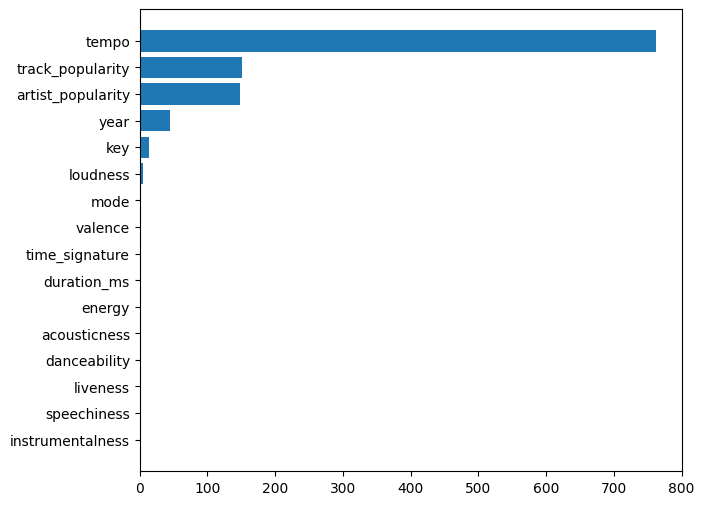

Variances :
 year                  44.019139
track_popularity     151.081623
artist_popularity    148.334437
danceability           0.019920
energy                 0.027172
key                   13.165967
loudness               4.329950
mode                   0.240398
speechiness            0.006169
acousticness           0.024440
instrumentalness       0.004141
liveness               0.010560
valence                0.051902
tempo                762.738973
duration_ms            0.031542
time_signature         0.047985
dtype: float64


In [389]:
# visualisation
plt.figure(figsize=(7,6))
plt.barh(numeric_df.var().sort_values().index, numeric_df.var().sort_values().values) # visualisation de la variance 
plt.show()

variances = numeric_df.var()
print("Variances :\n" , variances)

# Variance faible => variables peu informatives, vairance élevée => variables discriminantes


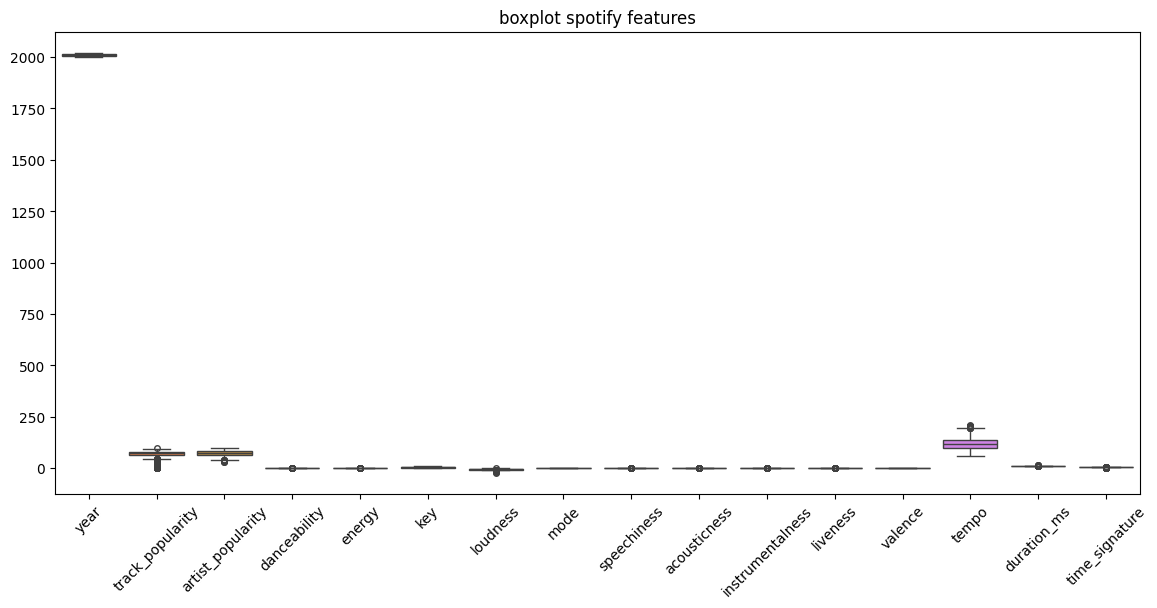

In [390]:
plt.figure(figsize=(14,6))
plt.title('boxplot spotify features')
data_box=sns.boxplot(data=numeric_df,fliersize=4)  
plt.xticks(rotation=45)
plt.show()

year                 3.056885e-01
track_popularity     8.939741e-01
artist_popularity    5.132679e-01
danceability         5.666007e-01
energy               4.962304e-01
key                  3.657213e-01
loudness             7.160870e-01
mode                 2.403982e-01
speechiness          1.189846e+00
acousticness         7.145405e-01
instrumentalness     1.402087e+06
liveness             8.311202e-01
valence              3.971635e-01
tempo                5.156930e-01
duration_ms          7.439015e-01
time_signature       4.798469e-02
dtype: float64


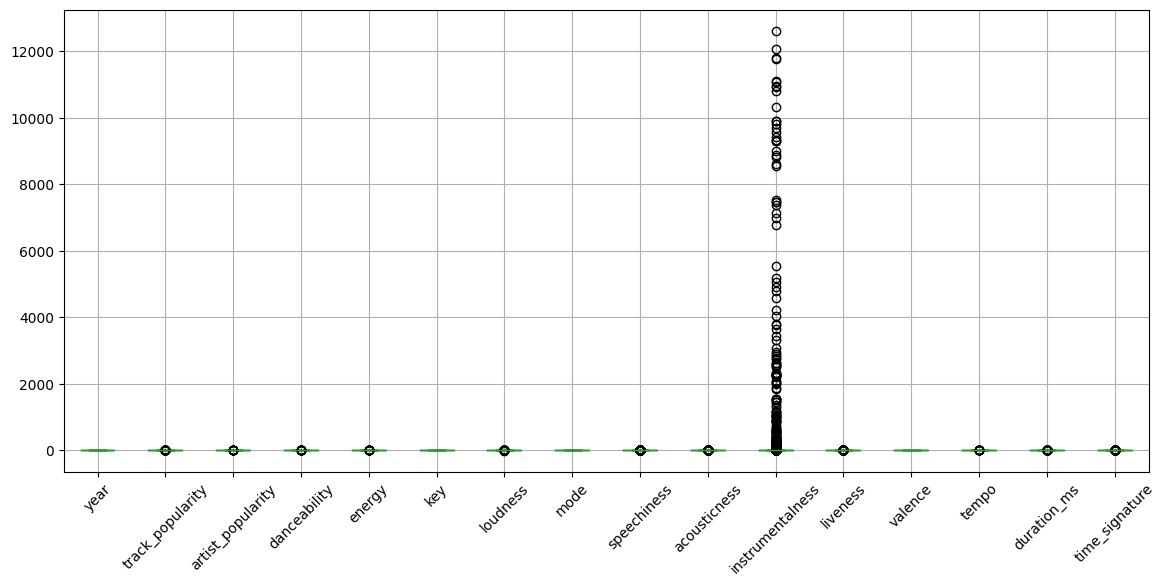

In [391]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()  # standardisation
X_scaled = scaler.fit_transform(numeric_df) # on obtient un tableau numpy après application 

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_df.columns) # on recréer un df
print(X_scaled_df.var())

plt.figure(figsize=(14,6))
X_scaled_df.boxplot()
plt.xticks(rotation=45)
plt.show()
